# External modules

In [1]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are 

In [2]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [3]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Data

In [4]:
source <- "./06_experimentation_2/final_dataset.csv"

In [5]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [6]:
str(data)

'data.frame':	21452 obs. of  59 variables:
 $ timestamp             : int  316278166 316311548 316378139 316411240 316444763 316477898 316511375 316544922 316612187 316644571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.47 2.47 2.47 2.47 2.47 ...
 $ velocity_latitude     : num  -1.22e-11 -1.56e-11 -1.12e-11 -1.09e-11 -1.39e-11 ...
 $ velocity_longitude    : num  6.17e-11 8.17e-11 6.14e-11 6.17e-11 8.12e-11 ...
 $ velocity              : num  6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ lateral_error         : num  -0.169 -0.139 -0.17 -0.178 -0.176 ...
 $ longitudinal_error    : num  -0.446 -0.452 -0.443 -0.438 -0.439 ...
 $ haversine_error       : num  0.476 0.473 0.474 0.472 0.472 ...
 $ latitude_error        : num  -3.56e-06 -3.59e-06 -3.58e-06 -3.42e-06 -3.55e-06 ...
 $ longitude_error       : num  -3.20e-06 -3.47e-06 -3.10e-06 -3.83e-06 -3.10e-06 ...
 $ heading_error         : num  0.304 0.235 0.273 0.14 0.305 ...
 $ late

# Outlier detection

In [7]:
coefficient_iqr <- 3
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error_abs

In [8]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [10]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]   123   124   125   126   127   128   129   130   131   132   133   134
 [13]   135   136   137   138   139   140   141   241   242   243   244   245
 [25]   246   247   248   249   250   251   252   253   254   255   256   257
 [37]   258   259   260   261   262   263   264   265   266   267   268   269
 [49]   270   271   272   273   274   275   276   277   278   293   294   295
 [61]   296   297   298   299   300   301  2276  2277  2278  2279  2280  2281
 [73]  2282  2283  2284  2285  2286  2287  2288  2289  2290  2291  2292  2293
 [85]  2294  2295  2296  2297  2298  2299  2300  2301  2302  2303  2304  2305
 [97]  2306  2307  2308  2309  2310  2311  2312  2313  2314  2315  2316  2317
[109]  2318  2319  2320  2321  2322  2323  2324  2325  2326  2327  2328  2329
[121]  2330  2331  2332  2333  2334  2335  2336  2337  2338  2339  2340  2341
[133]  2342  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353
[145]  2354  2355  2356  2357  2358  2359  2360  2361  2362  236

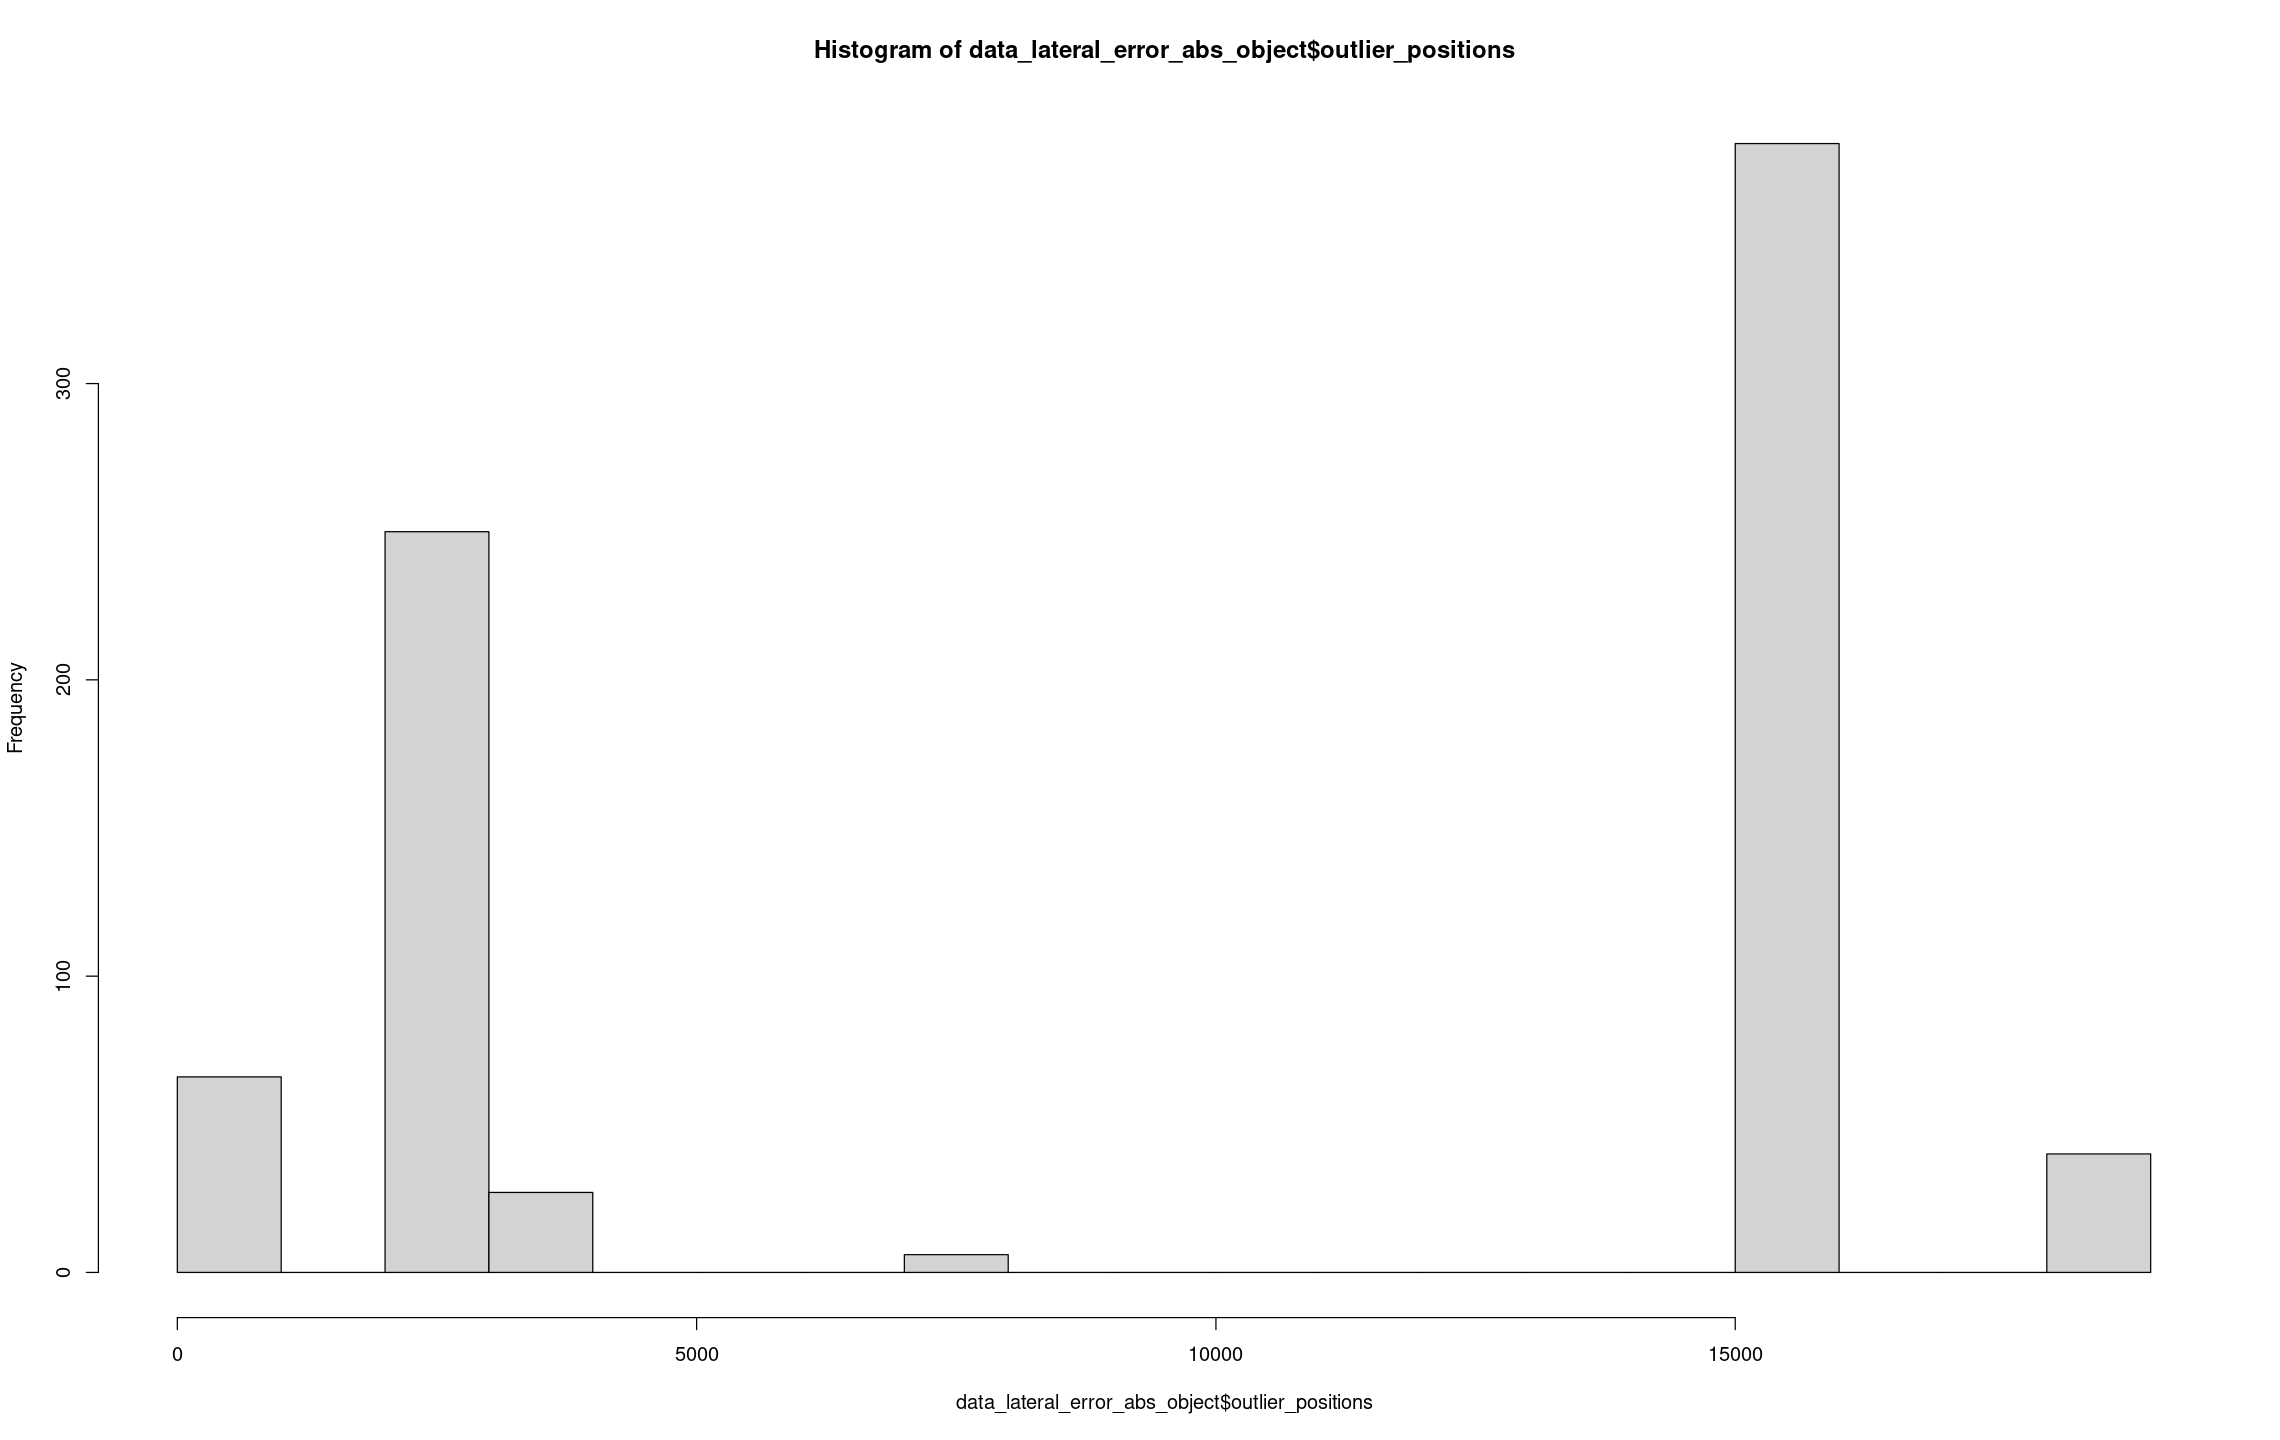

In [11]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        21'452        21'452             0        20'803             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0245297992  0.0475101501  0.1158896163  0.2515075505  0.5026936978
                                                                      
         range            sd         vcoef           mad           IQR
  1.6613814484  0.3373214354  0.9343852863  0.2324148830  0.3868040815
                                                                      
          mean        meanCI
  0.3610089332  0.3564947140
                0.3655231523
                            
           .90           .95
  0.740133

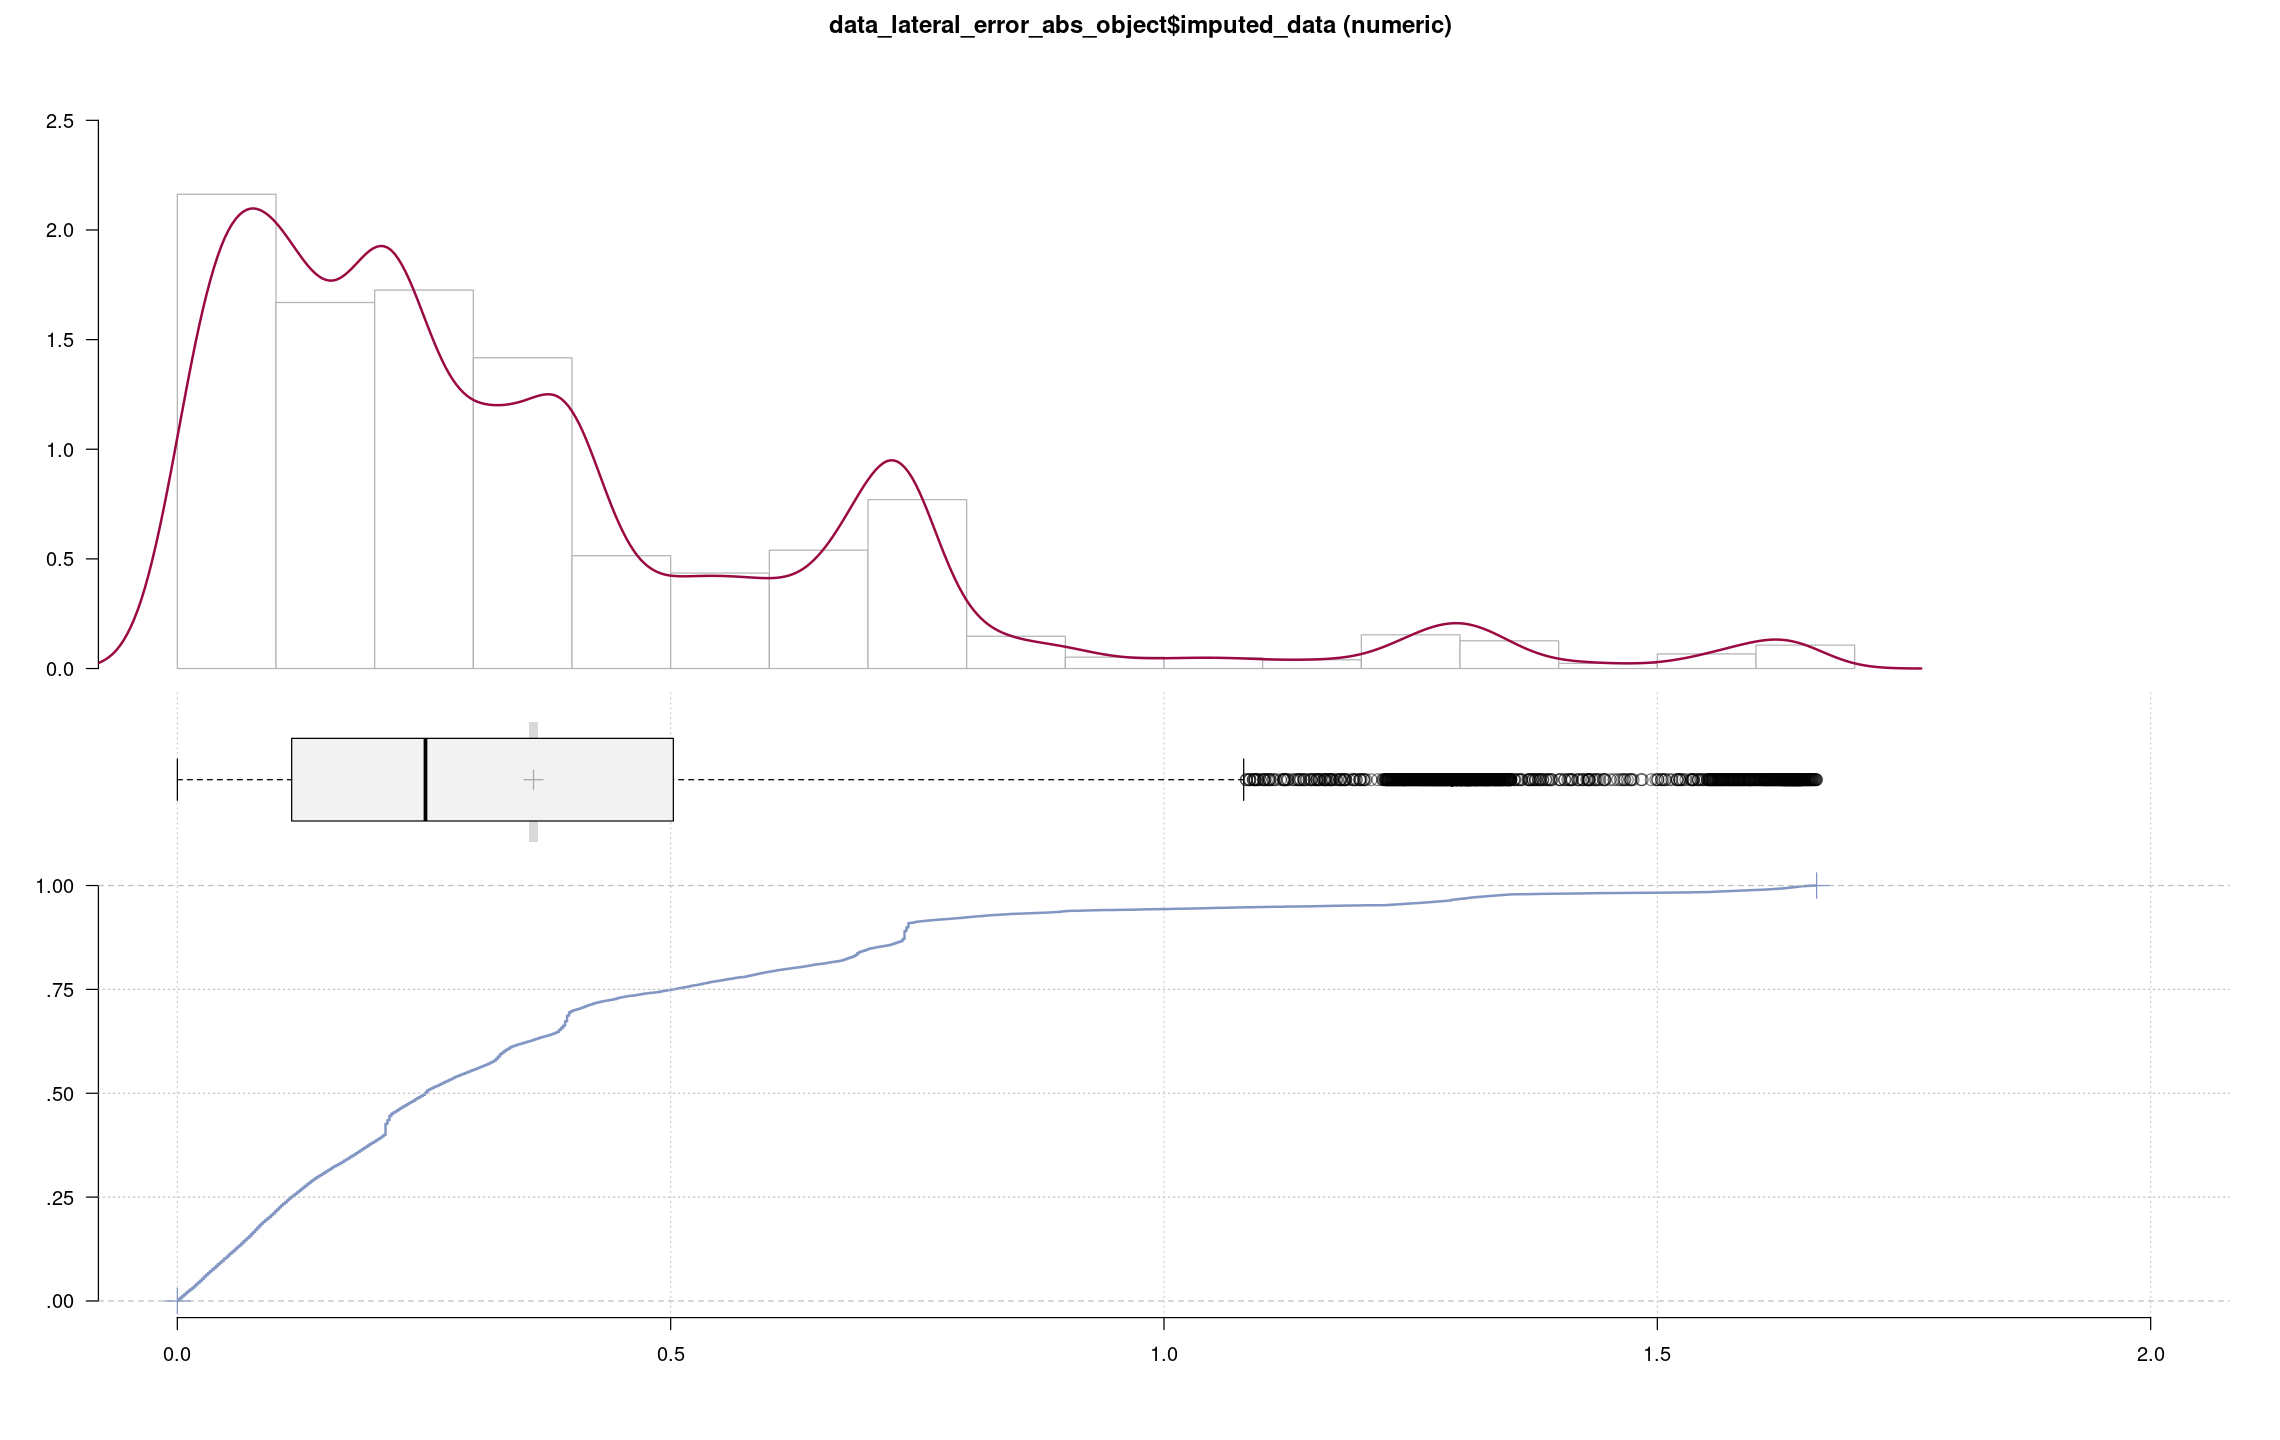

In [12]:
Desc(data_lateral_error_abs_object$imputed_data)

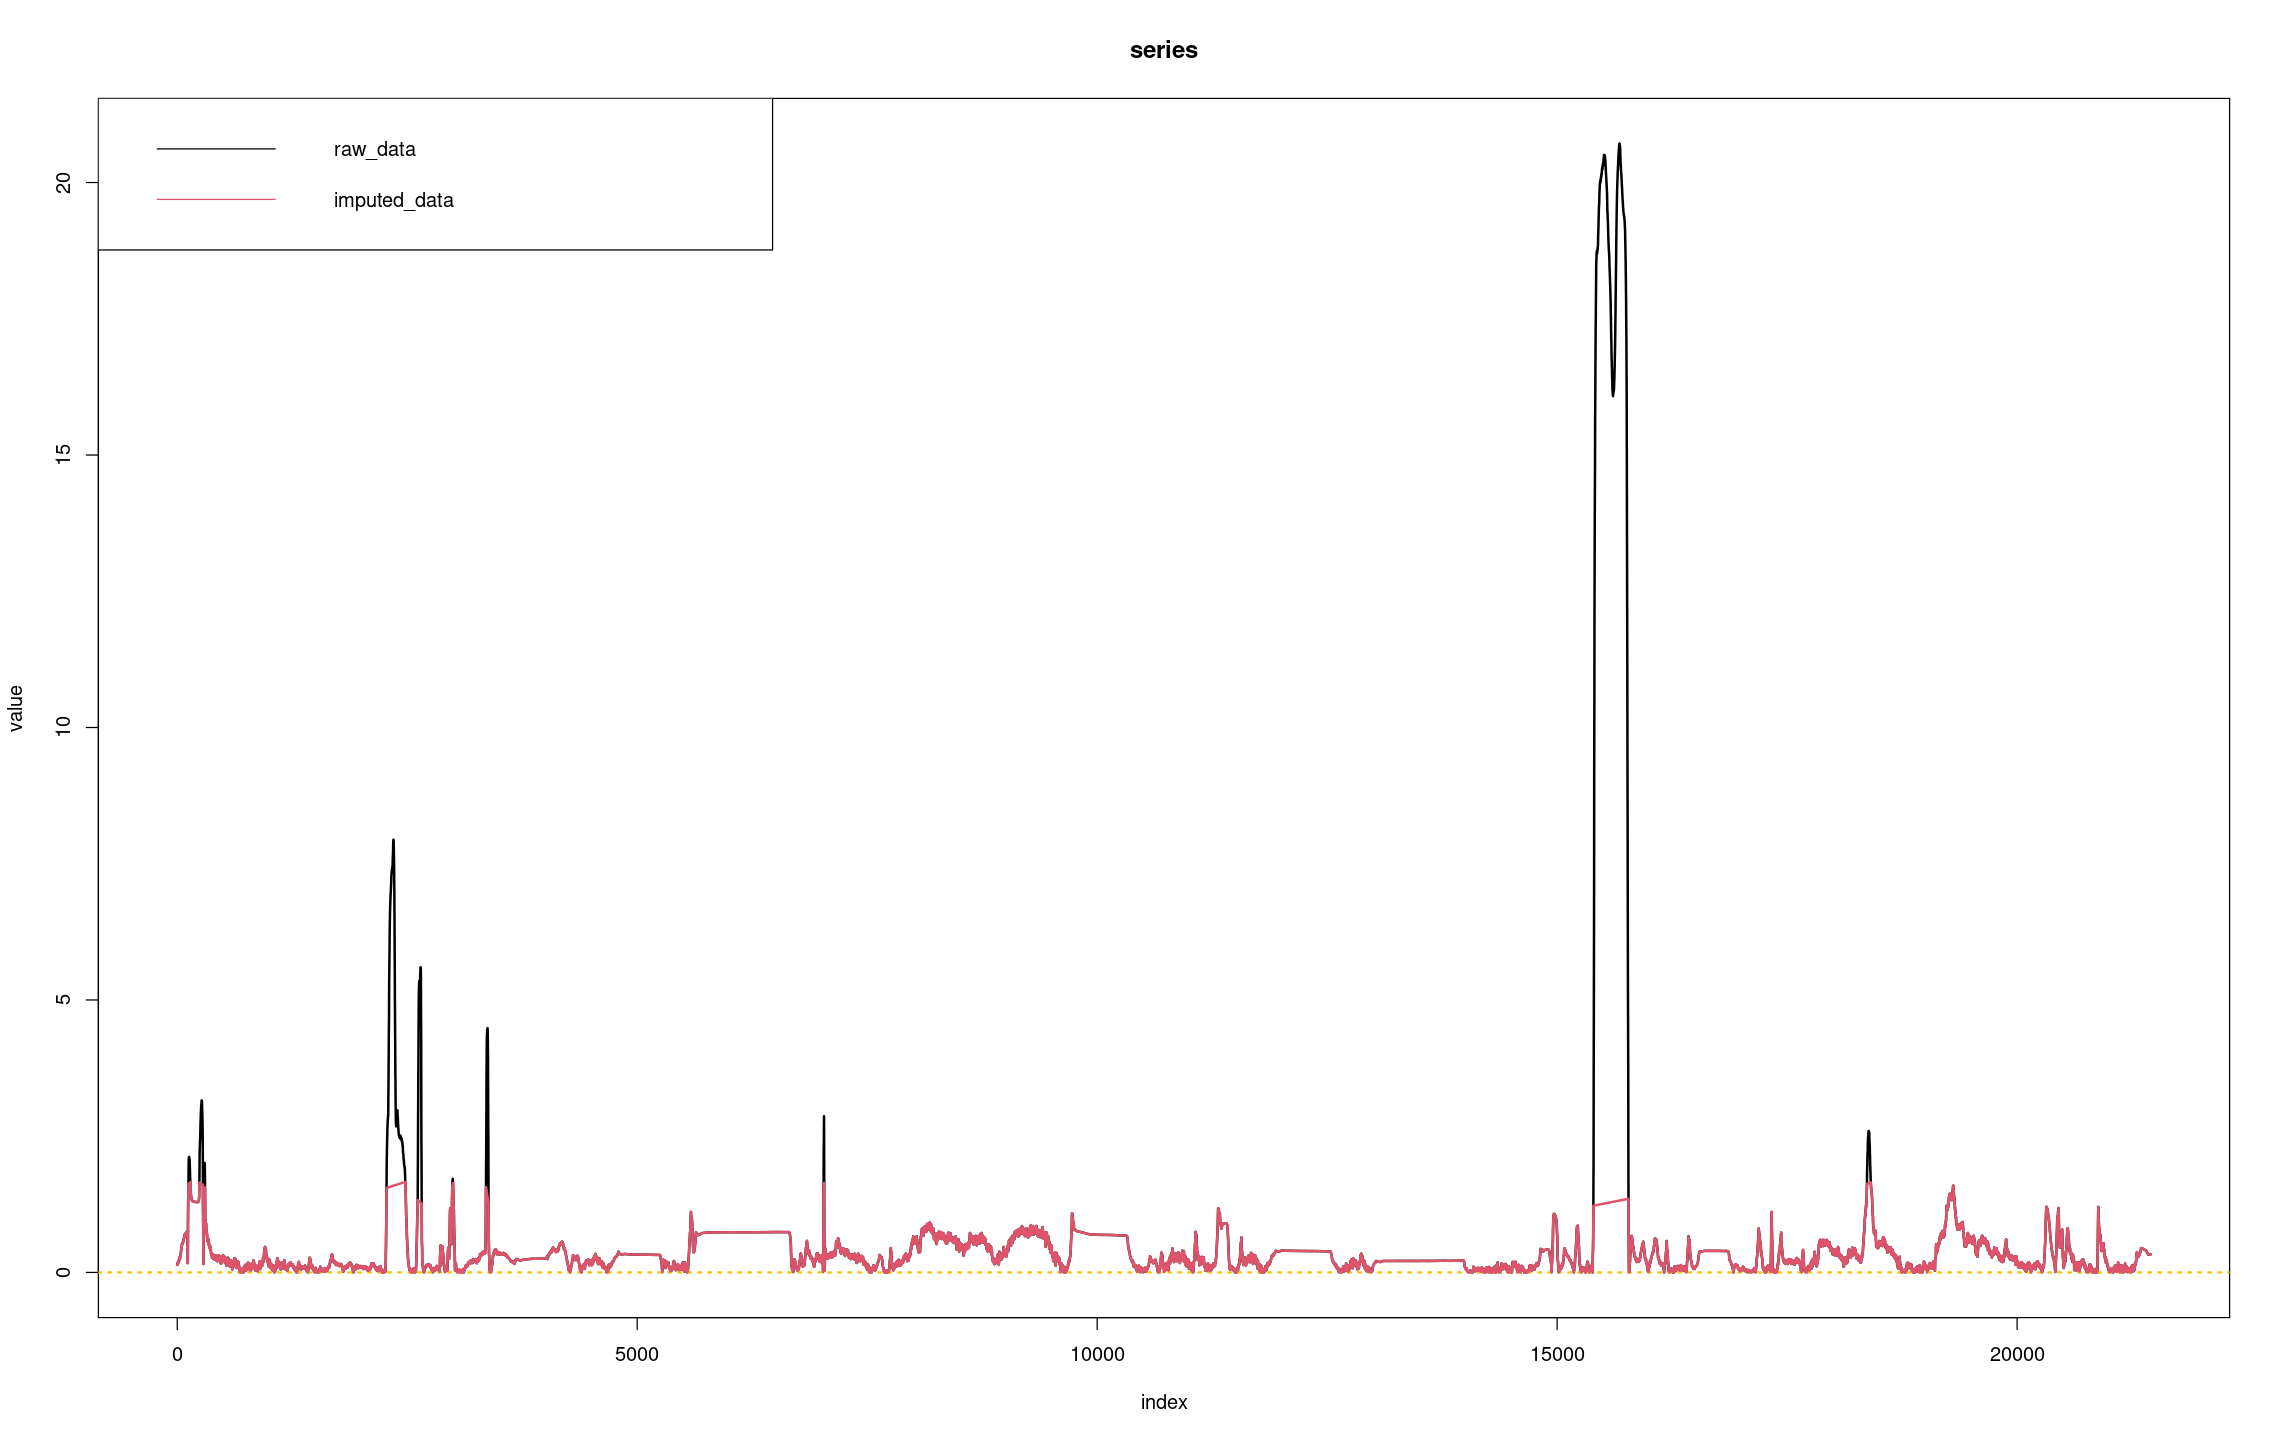

In [13]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [14]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [15]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [16]:
print(data_longitudinal_error_abs_object$outlier_positions)

  [1]   104   105   106   107   108   109   110   111   112   113   114   115
 [13]   116   117   118   119   120   121   122   123   124   125   126   127
 [25]   128   129   130   131   132   133   134   135   136   137   138   139
 [37]   140   141   142   143   144   145   146   147   148   149   150   151
 [49]   152   153   154   155   156   157   158   159   160   161   162   163
 [61]   164   165   166   167   168   169   170   171   172   173   174   175
 [73]   176   177   178   179   180   181   182   183   184   185   186   187
 [85]   188   189   190   191   192   193   194   195   196   197   198   199
 [97]   200   201   202   203   204   205   206   207   208   209   210   211
[109]   212   213   214   215   216   217   218   219   220   221   222   223
[121]   224   225   226   227   228   229   230   231   232   233   234   235
[133]   236   237   238   239   240   241   242   243   244   245   246   247
[145]   248   249   250   251   252   253   254   255   256   25

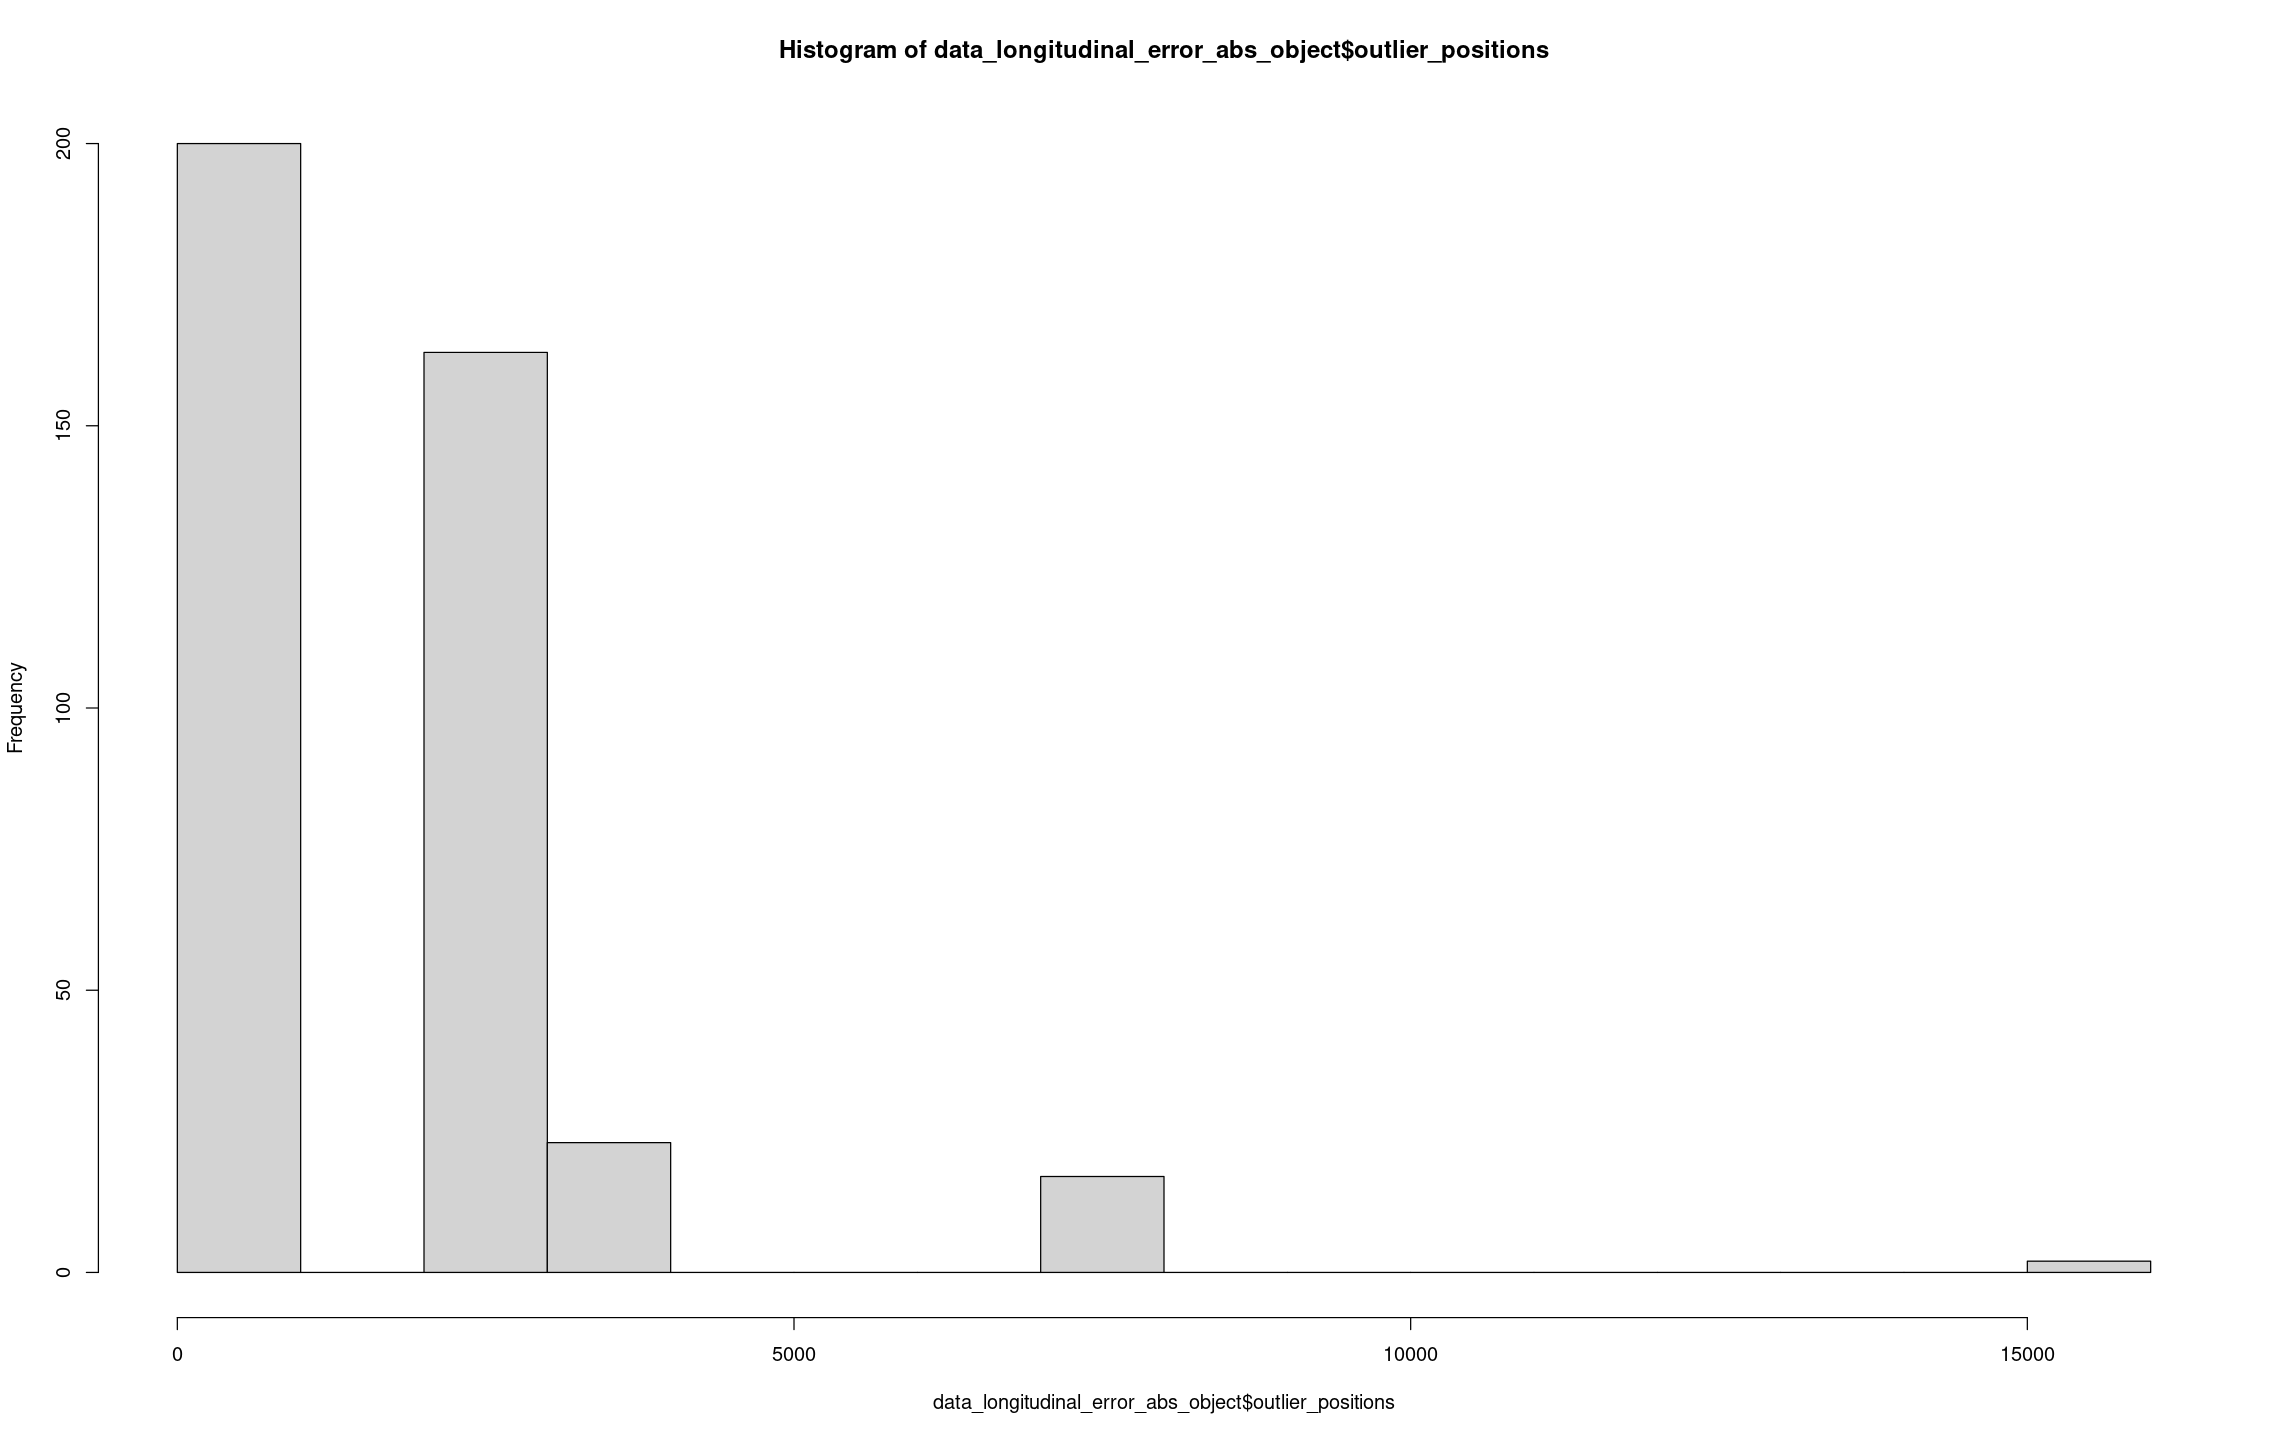

In [17]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        21'452        21'452             0        20'816             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0055352795  0.0115877689  0.0443056384  0.1001653448  0.2002292387
                                                                      
         range            sd         vcoef           mad           IQR
  0.6608811187  0.1261422860  0.9171712571  0.0990403755  0.1559236003
                                                                      
          mean        meanCI
  0.1375340593  0.1358459545
                0.1392221640
                            
           .90           .95
  0.3

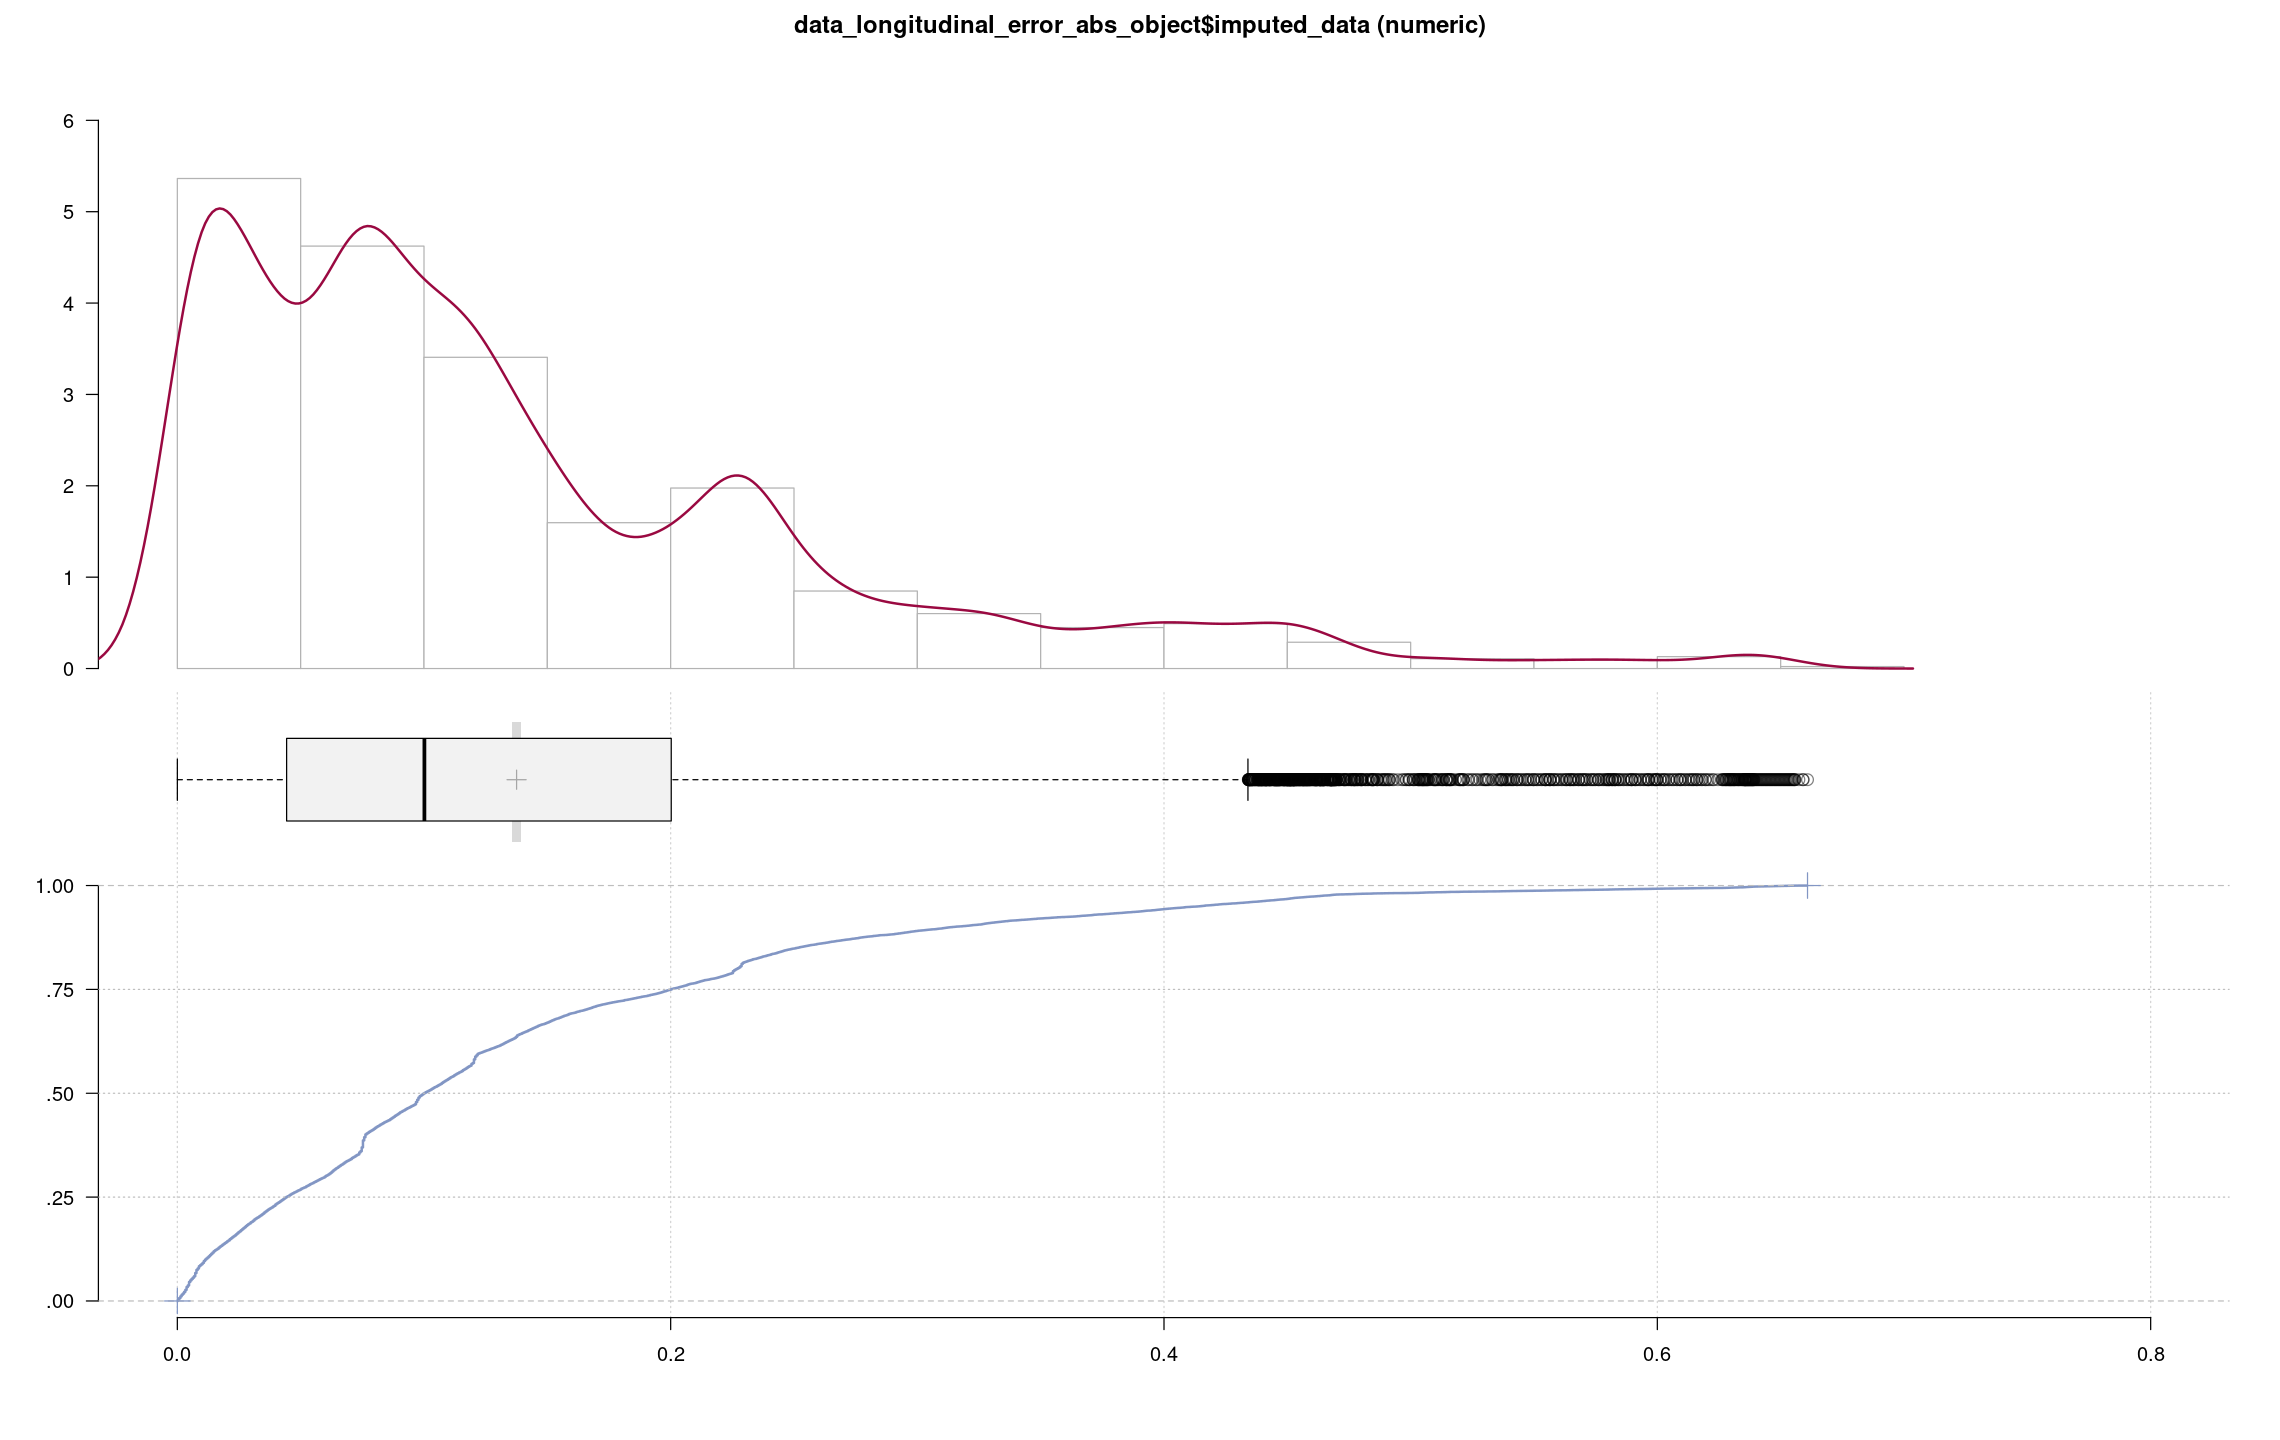

In [18]:
Desc(data_longitudinal_error_abs_object$imputed_data)

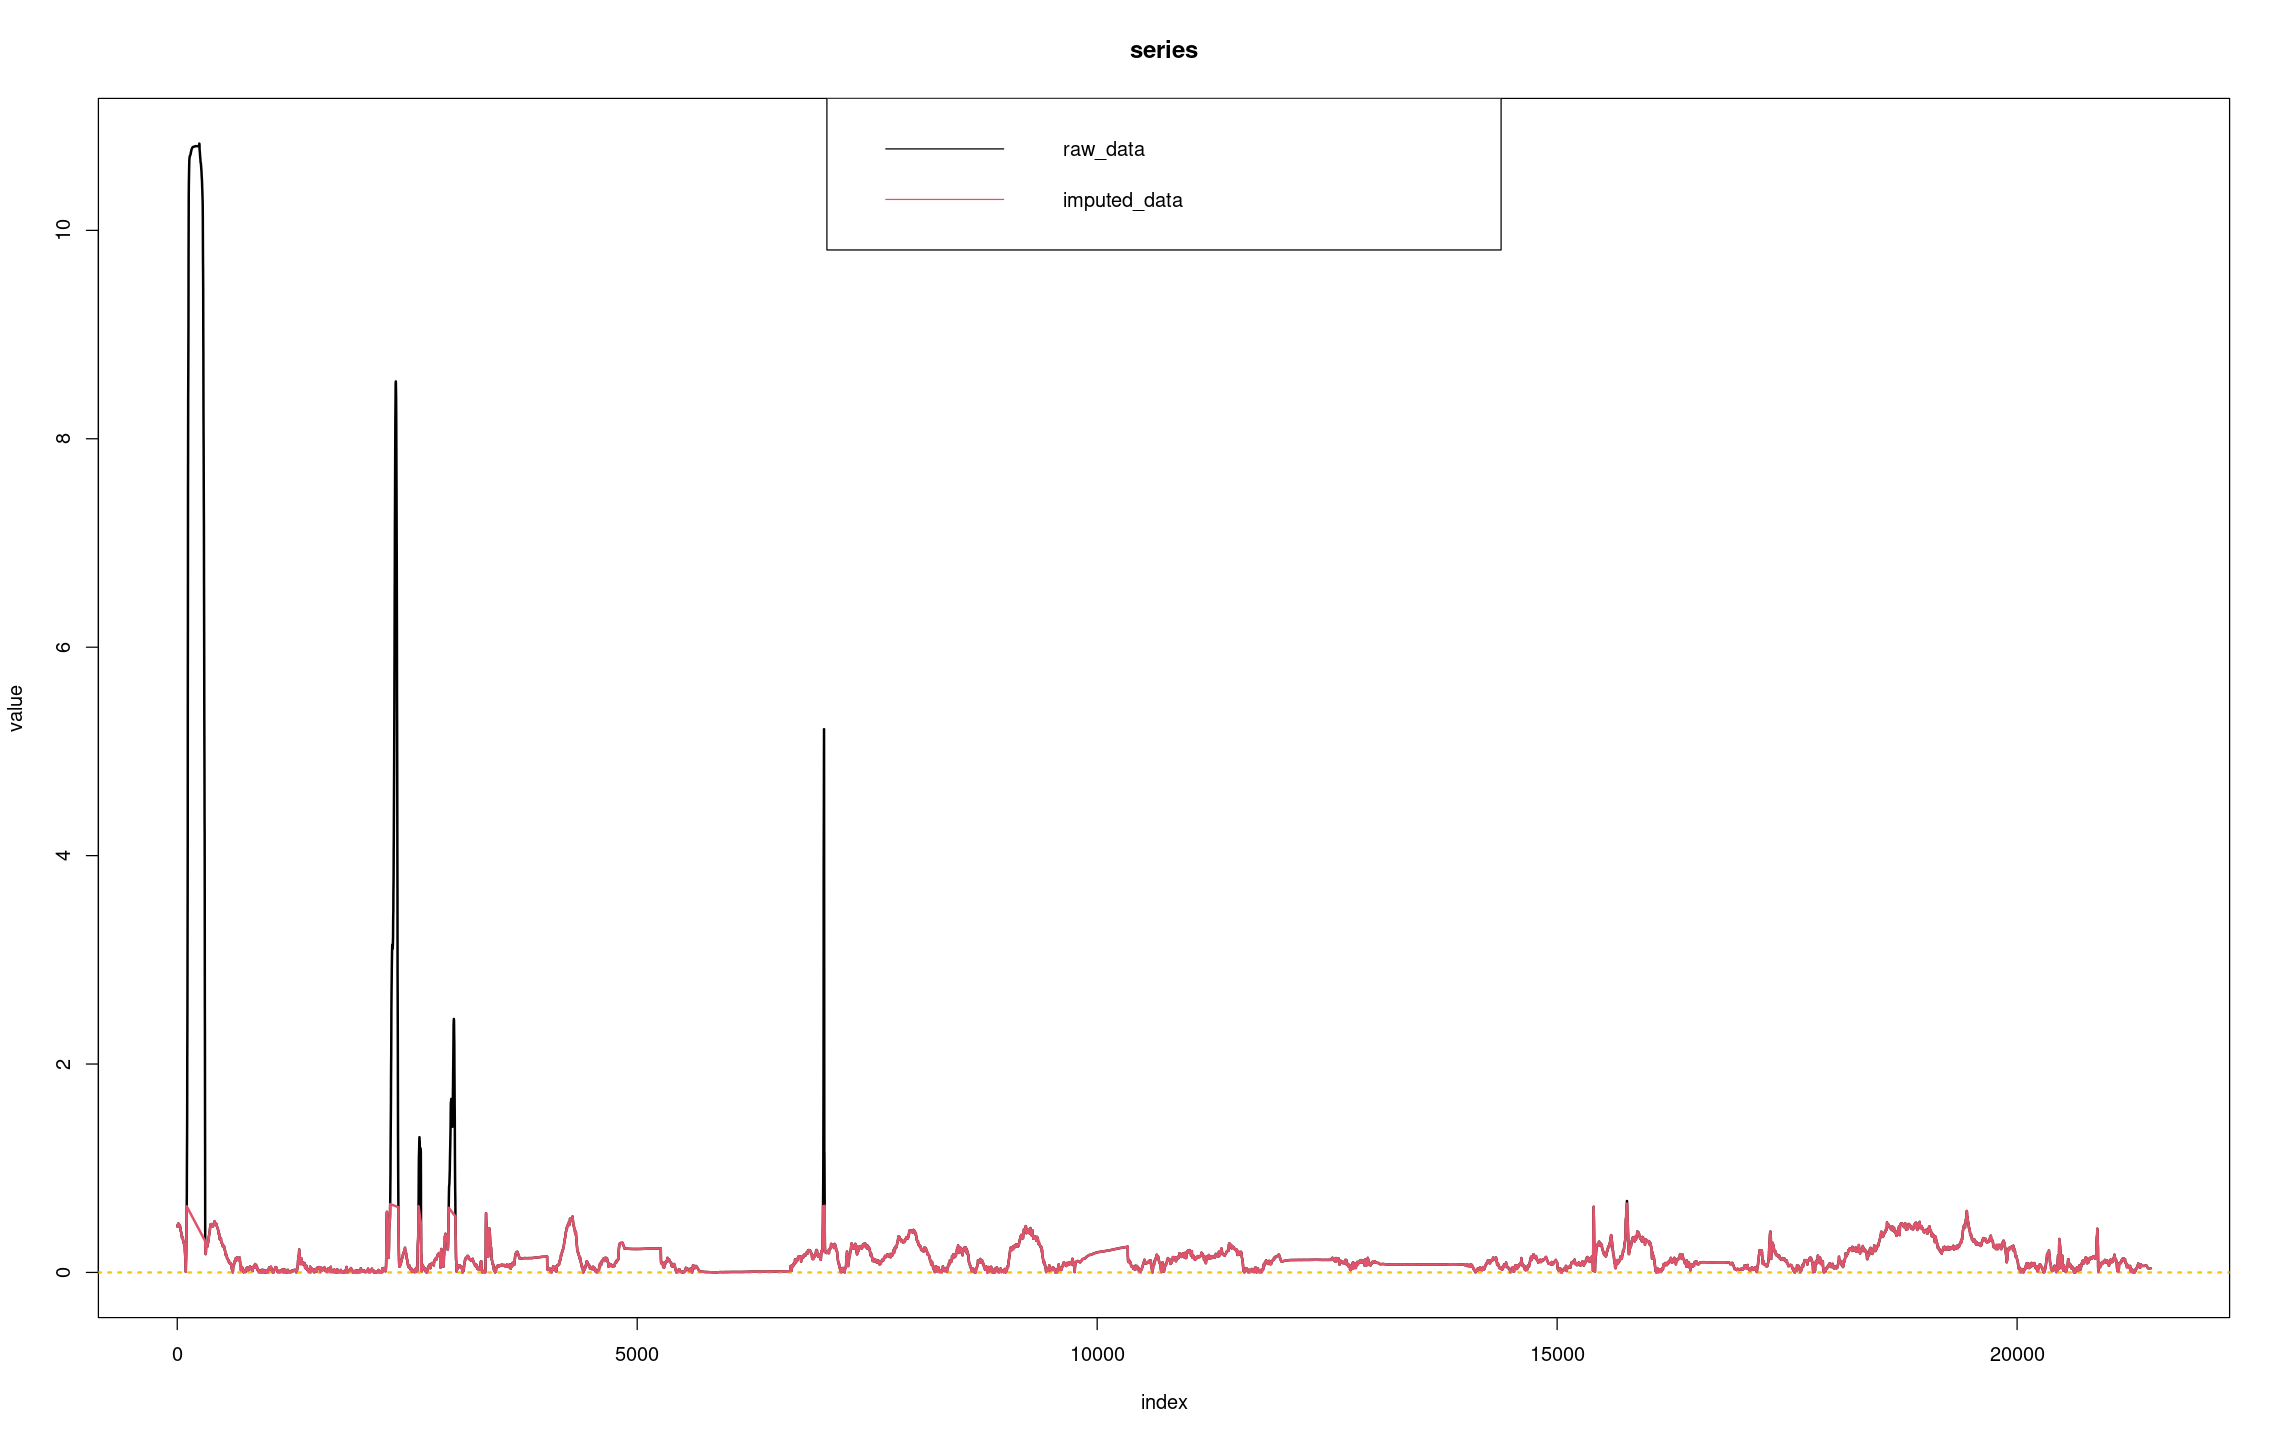

In [19]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)
